In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import sparse as sp

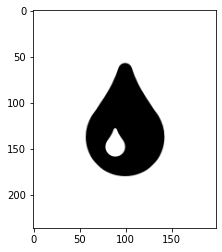

In [2]:
I = cv2.imread('im_goutte.png', 0)
In = cv2.normalize(I,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
plt.figure()
plt.imshow(In,'gray')
plt.show()

    Initialisation du snake

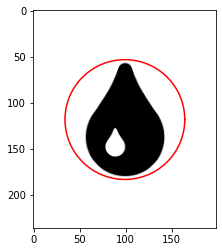

In [3]:
image_x = I.shape[0]
image_y = I.shape[1]

x_cercle = []
y_cercle = []

R = 65      #rayon du cercle
K = 200     #nombre de points du cercle

theta = np.linspace(0,2*np.pi,K)
x_cercle = image_y/2 + R*np.cos(theta)
y_cercle = image_x/2 + R*np.sin(theta)

plt.figure()
plt.imshow(In,'gray')
plt.plot(x_cercle,y_cercle,color='red')
plt.show()

    Initialisation de l'algorithme

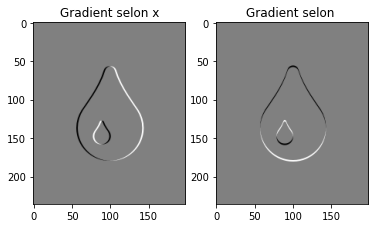

In [4]:
alpha = 1 #poid de l'energie elastique
beta = 1 #poid de l'energie de courbure
gamma = 1 #poid de l'energie de l'image
deltat = 0.1 #pas temporel

GradientI_x = np.gradient(In,axis = 1)
GradientI_y = np.gradient(In,axis = 0)

Norm_GradientI = GradientI_x**2 + GradientI_y**2
Gradient_Norm = np.gradient(Norm_GradientI)             #Calcul du gradient de la norme


plt.figure()
plt.subplot(121)
plt.imshow(GradientI_x,'gray')
plt.title('Gradient selon x')
plt.subplot(122)
plt.imshow(GradientI_y,'gray')
plt.title('Gradient selon ')
plt.show()

In [5]:
#Opérateurs differentiels

D2 = sp.diags([1,-2,1],[-1,0,1],shape=(K,K)).toarray()      #Des 1 sur la diagonale -1, des -2 sur la diagonale 0 et des 1 sur la diagonale 1
D2[K-1,0] = 1
D2[0,K-1] = 1

D4 = sp.diags([1,-4,6,-4,1],[-2,-1,0,1,2],shape=(K,K)).toarray()
D4[K-2,0] = 1
D4[K-1,1] = 1
D4[0,K-2] = 1
D4[1,K-1] = 1
D4[0,K-1] = -4
D4[K-1,0] = -4


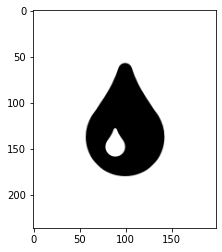

In [6]:
#Implémentation de la procédure

epsilon = 1   #critère d'arrêt correspondant à x_n+1 - x_n

xn = np.zeros(K)
yn = np.zeros(K)

xn1 = x_cercle
yn1 = y_cercle

Id  = sp.eye(K)
D = alpha*D2 - beta*D4
A1 = (Id - deltat*D)
A = np.linalg.inv(A1)

while (np.linalg.norm(xn1 - xn)<epsilon and np.linalg.norm(yn1 - yn)<epsilon):
    xn = xn1
    yn = yn1
    print(np.linalg.norm(xn1 - xn))
    xn1 = np.dot(A,(xn + deltat*gamma*Gradient_Norm[1][xn.astype(int),yn.astype(int)]))
    yn1 = np.dot(A,(yn + deltat*gamma*Gradient_Norm[0][xn.astype(int),yn.astype(int)]))

plt.figure()
plt.imshow(In,'gray')
plt.plot(xn,yn,color='red')
plt.show()
   